<a href="https://colab.research.google.com/github/radhe30/Human-Activity-detector-using-LSTM/blob/main/Human_activity_detector_using_ConvLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install pafy youtube-dl moviepy

In [2]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from moviepy.editor import *
%matplotlib inline

  if event.key is 'enter':



In [3]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [5]:

!apt-get install unrar -y
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
# Extract the dataset
!unrar x UCF50.rar


Streaming output truncated to the last 5000 lines.
Extracting  UCF50/HorseRace/v_HorseRace_g16_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v

In [6]:
#matplotlib
plt.figure(figsize = (20, 20))
all_class_names = os.listdir('UCF50')

<Figure size 2000x2000 with 0 Axes>

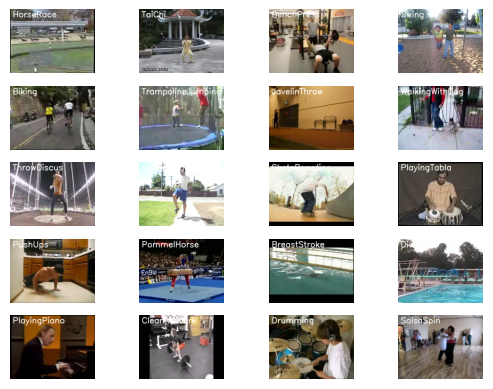

In [8]:
random_range = random.sample(range(len(all_class_names)), 20)
for counter, random_index in enumerate(random_range, 1):
    selected_class_name = all_class_names[random_index]

    video_files_names_list=os.listdir(f'UCF50/{selected_class_name}')
    selected_video_file_name=random.choice(video_files_names_list)

    video_reader=cv2.VideoCapture(f'UCF50/{selected_class_name}/{selected_video_file_name}')

    _, bgr_frame=video_reader.read()
    video_reader.release()
    rgb_frame=cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255),2)
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')